# Examples
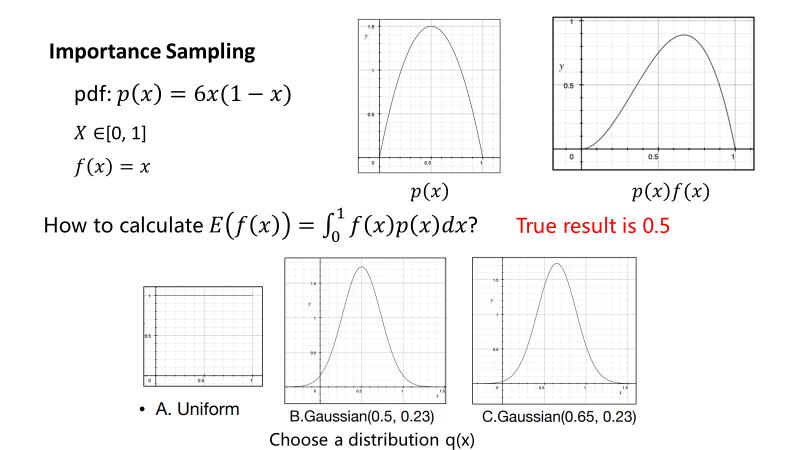

$$
\begin{split}
\mathbb{E}_p[f(x)]&=\int f(x)\frac{p(x)}{q(x)}q(x)dx\\
&=\int f(x)w(x)q(x)dx, \qquad w(x)=\frac{p(x)}{q(x)} \text{[Note that w(x) is unnormalized!]}\\
&=\mathbb{E}_q[f(x)w(x)]\\
&\approx\frac{1}{N}\sum_i^Nf(x_i)w(x_i)_{x_i\sim q(x)}\\
&\text{(if $w(x)$ is normalized to be $\hat{w}(x)$)}\\
&\approx\sum_i^Nf(x_i)\hat{w}(x_i)
\end{split}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import logsumexp


class Pdf:
    def __call__(self, x):
        """log prob"""
        pass

    def sample(self, n):
        pass


# Target Distribution
class Target(Pdf):
    #     def __init__(self, mu=0, sigma=1):
    #         self.mu = mu
    #         self.sigma = sigma

    def __call__(self, x):
        return np.log(6 * x * (1 - x))


class ImportanceSampler:
    def __init__(self, p_dist, q_dist):
        self.p_dist = p_dist
        self.q_dist = q_dist

    def sample(self, n):
        samples = self.q_dist.sample(n)  # Generate n random numbers following q
        weights = self.calc_weights(samples)  # Unnormalized weights
        norm_weights = weights - logsumexp(weights)  # Normalized weights
        return samples, norm_weights

    def calc_weights(self, samples):
        # log w_i
        return self.p_dist(samples) - self.q_dist(samples)


def f(x):
    return x

## A. Uniform Distribution

result of A:0.5002610051409125
error of A:0.00026100514091254023


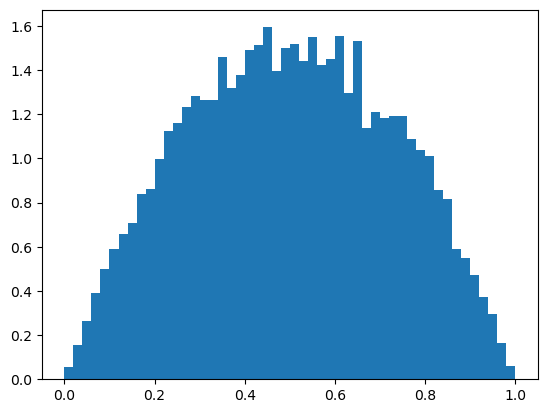

In [2]:
# Importance/ Proposal Distribution


class Uniform(Pdf):
    def __init__(self, low, high):
        self.low = low
        self.high = high

    def __call__(self, x):
        return np.repeat(-np.log(self.high - self.low), len(x))

    def sample(self, n):
        return np.random.uniform(self.low, self.high, n)


p = Target()  # Target distribution
q = Uniform(0, 1)  # A: uniform distribution: q(x)=1, x in (0, 1)


Num_samples = 10000

sampler = ImportanceSampler(p, q)
biased_samples, ws = sampler.sample(Num_samples)

result = np.sum(f(biased_samples) * np.exp(ws))
errors = np.abs(result - 0.5)

print(f"result of A:{result}")
print(f"error of A:{errors.mean()}")

_ = plt.hist(biased_samples, bins=50, weights=np.exp(ws), density=True)


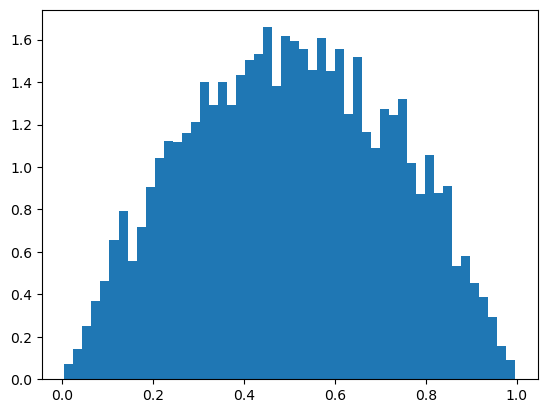

In [3]:
samples = np.random.choice(biased_samples, Num_samples, p=np.exp(ws))
_ = plt.hist(samples, bins=50, density=True)

## B. Gaussian $\mu = 0.5; \sigma = 0.23$

In [22]:
class Target(Pdf):
    #     def __init__(self, mu=0, sigma=1):
    #         self.mu = mu
    #         self.sigma = sigma

    def __call__(self, x):
        p = 6 * x * (1 - x)
        p = (np.sign(p) + 1) / 2 * p + 1e-8
        return np.log(p)


# Importance/ Proposal Distribution
class Norm(Pdf):
    def __init__(self, mu=0, sigma=1):
        self.mu = mu
        self.sigma = sigma

    def __call__(self, x):
        return -0.5 * (x - self.mu) ** 2 / self.sigma**2

    def sample(self, n):
        return self.sigma * np.random.randn(n) + self.mu

In [29]:
p = Target()  # Target distribution
q = Norm(0.5, 0.23)  # B: mu = 0.5; sigma = 0.23

Num_samples = 10000

sampler = ImportanceSampler(p, q)
biased_samples, ws = sampler.sample(Num_samples)

result = np.sum(f(biased_samples) * np.exp(ws))
errors = np.abs(result - 0.5)

print(f"result of A:{result}")
print(f"error of A:{errors.mean()}")


result of A:0.5004003269410913
error of A:0.0004003269410912669


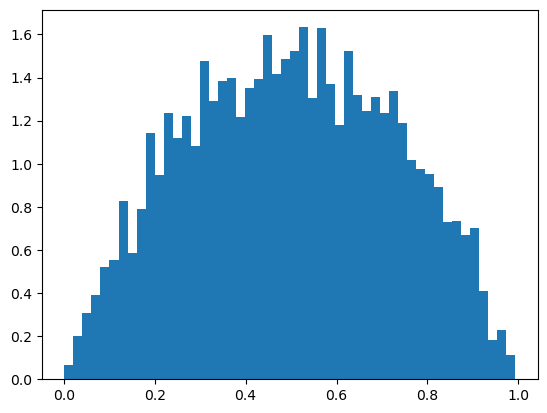

In [30]:
samples = np.random.choice(biased_samples, Num_samples, p=np.exp(ws))
_ = plt.hist(samples, bins=50, density=True)

## C. Gaussian $\mu = 0.65; \sigma = 0.23$

In [26]:
p = Target()  # Target distribution
q = Norm(0.5, 0.23)  # B: mu = 0.5; sigma = 0.23

Num_samples = 10000

sampler = ImportanceSampler(p, q)
biased_samples, ws = sampler.sample(Num_samples)

result = np.sum(f(biased_samples) * np.exp(ws))
errors = np.abs(result - 0.5)

print(f"result of A:{result}")
print(f"error of A:{errors.mean()}")
samples = np.random.choice(biased_samples, Num_samples, p=np.exp(ws))


result of A:0.502336558080872
error of A:0.0023365580808719644


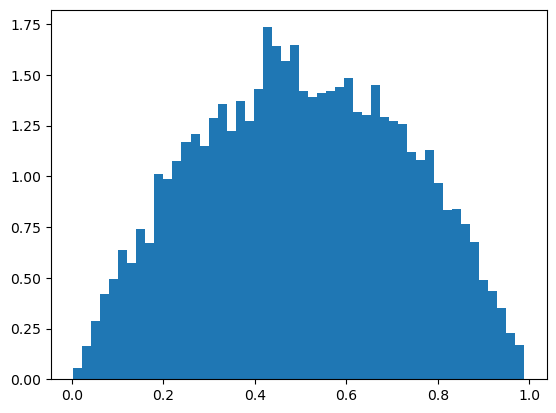

In [27]:
samples = np.random.choice(biased_samples, Num_samples, p=np.exp(ws))
_ = plt.hist(samples, bins=50, density=True)